# P3
# Nombre: Jonathan Paredes

## Mínimos cuadrados

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al aplicar el método de interpolación por mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$


En caso de la ecuación de segundo grado:
$  f(x) = a x^2+ b x+c $

se obtiene 
$ ( \sum (y_i - a x_i^2 - b x_i -c ) ( x_i^2) ,  \sum (y_i - a x_i^2 - b x_i  -c) ( x_i), \sum (y_i - a x_i^2 - b x_i  -c )  ) = 0 $


In [1]:
pip install numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


/home/paredesj-epn/miniforge3/lib/python3.10/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


El promedio del error relativo es: 4.317745017176352 × 10^-2


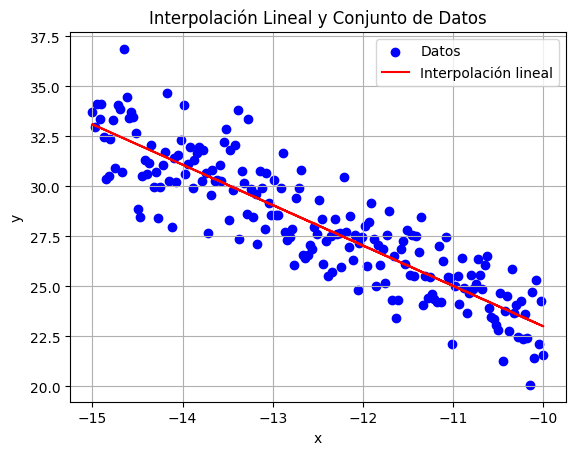

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
xs = [-10.08, -10.83, -12.36, -11.06, -11.16, -13.79, -14.92, -12.01, -14.9, -11.26, -10.13, -15.0, -13.22, -10.65, -10.88, -12.39, -13.54, -13.69, -11.61, -14.6, -10.63, -12.16, -12.64, -14.12, -10.4, -10.25, -14.95, -11.68, -12.96, -10.2, -11.83, -13.62, -13.27, -12.46, -14.7, -13.52, -13.44, -12.84, -10.73, -13.92, -10.23, -10.1, -13.34, -14.82, -14.97, -14.85, -10.28, -14.52, -11.33, -13.24, -10.53, -14.57, -10.78, -13.07, -14.5, -14.77, -12.04, -13.97, -11.63, -13.72, -13.87, -10.75, -11.76, -12.14, -14.37, -10.6, -13.67, -10.8, -12.59, -13.17, -14.45, -11.53, -11.13, -13.84, -12.09, -13.29, -12.94, -12.54, -12.76, -11.81, -10.35, -13.57, -11.18, -11.43, -11.21, -10.43, -12.69, -12.91, -13.89, -14.55, -12.89, -11.96, -10.33, -13.94, -10.9, -12.56, -11.91, -14.1, -10.55, -13.32, -11.71, -10.03, -12.34, -11.58, -11.88, -14.87, -14.2, -14.72, -11.78, -12.51, -13.19, -12.79, -12.81, -14.15, -12.71, -14.35, -11.66, -10.38, -11.48, -11.56, -11.51, -12.74, -13.12, -14.75, -10.93, -10.85, -14.07, -10.18, -11.98, -14.42, -13.99, -10.0, -12.61, -12.26, -12.99, -10.58, -11.23, -14.62, -12.11, -12.21, -11.11, -12.66, -13.59, -14.8, -13.09, -12.29, -13.64, -10.15, -14.32, -11.41, -14.25, -11.28, -10.45, -14.67, -14.47, -10.68, -11.38, -13.77, -10.5, -11.01, -14.05, -14.3, -12.31, -13.47, -13.02, -12.49, -13.14, -12.41, -11.08, -11.36, -10.05, -13.37, -10.98, -12.24, -13.82, -14.17, -12.06, -13.49, -13.04, -11.46, -14.02, -13.42, -12.44, -10.95, -10.3, -11.93, -13.39, -14.65, -12.86, -12.19, -10.7, -14.27, -11.31, -14.4, -11.73, -14.22, -10.48, -11.86, -11.03, -13.74]
ys = [25.33, 24.68, 27.52, 25.46, 27.04, 30.29, 33.39, 27.49, 34.13, 25.45, 24.72, 33.7, 28.49, 26.09, 24.92, 25.53, 32.22, 29.58, 24.3, 33.44, 26.51, 26.98, 26.44, 27.97, 24.54, 24.25, 34.13, 24.31, 28.55, 23.6, 27.07, 30.31, 33.37, 28.38, 33.88, 32.87, 29.83, 27.3, 26.37, 31.98, 22.35, 21.4, 30.77, 30.5, 32.95, 30.36, 22.45, 32.67, 24.07, 29.86, 23.07, 33.73, 24.89, 30.66, 28.85, 33.32, 27.16, 30.62, 23.4, 27.65, 31.33, 25.1, 25.18, 28.52, 31.16, 23.93, 30.84, 25.55, 27.06, 27.1, 30.51, 26.1, 24.21, 31.65, 27.55, 28.63, 28.58, 27.98, 26.07, 26.07, 25.85, 30.28, 24.22, 25.51, 24.38, 23.76, 30.84, 29.91, 29.94, 33.48, 31.68, 26.04, 23.65, 31.14, 26.41, 26.85, 29.16, 31.43, 23.35, 30.19, 28.78, 24.25, 25.74, 26.85, 27.39, 32.48, 31.72, 34.07, 26.86, 27.63, 29.63, 27.86, 27.45, 30.29, 29.94, 32.06, 26.54, 22.77, 25.59, 27.28, 27.82, 29.42, 29.9, 30.93, 24.13, 23.66, 30.2, 22.42, 28.01, 31.32, 34.08, 21.57, 26.59, 27.68, 30.34, 23.49, 24.62, 34.49, 26.31, 30.45, 26.27, 26.58, 31.06, 32.36, 27.87, 27.6, 30.29, 20.07, 29.98, 27.5, 29.99, 24.41, 21.25, 30.74, 28.47, 24.88, 26.74, 31.8, 22.8, 22.12, 31.58, 30.7, 28.38, 31.83, 28.58, 29.32, 30.77, 27.26, 27.45, 28.49, 22.11, 27.35, 25.01, 25.99, 31.95, 34.65, 24.83, 28.3, 29.17, 27.55, 32.3, 32.05, 26.13, 25.53, 24.09, 28.21, 33.84, 36.87, 27.72, 27.73, 25.55, 28.44, 25.51, 30.61, 27.57, 31.07, 24.65, 25.01, 25.44, 30.65]

# Ajustar los mínimos cuadrados para una función lineal
A = np.vstack([xs, np.ones(len(xs))]).T
a1, a0 = np.linalg.lstsq(A, ys, rcond=None)[0]

# Función de interpolación
def f(x):
    return a1 * x + a0

# Calcular los valores predichos
y_pred = [f(x) for x in xs]

# Calcular el error relativo
errores_relativos = [abs((y_i - y_hat) / y_i) for y_i, y_hat in zip(ys, y_pred)]

# Calcular el promedio del error relativo
promedio_error_relativo = np.mean(errores_relativos)

# Expresar el resultado en notación científica
n = int(np.floor(np.log10(promedio_error_relativo)))
valor = promedio_error_relativo / 10**n

print(f"El promedio del error relativo es: {valor} × 10^{n}")

# Graficar los puntos y la interpolación
plt.scatter(xs, ys, color='blue', label='Datos')
plt.plot(xs, y_pred, color='red', label='Interpolación lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación Lineal y Conjunto de Datos')
plt.legend()
plt.grid(True)
plt.show()